In [1]:
import h5py
import numpy as np
from tqdm.notebook import tqdm
import os
import glob
import matplotlib.pyplot as plt
import time

from train_Informer_d import *

from utils import *
from models import *

import warnings
warnings.filterwarnings('ignore')

assert torch.cuda.is_available()
device = 'cuda'

In [2]:
train_f = sorted(glob.glob('train/*.hdf'))
# train_f.remove('../stock_price/train/20190425_20190510.hdf')
# train_f.remove('../stock_price/train/20190510_20190522.hdf')
test_f = sorted(glob.glob('test/*.hdf'))
# test_f.remove('../stock_price/test\IC2003_20191018.hdf') # batch为256时，第71个batch大小为2， 不足以用于预测

In [3]:
len(test_f)

174

In [4]:
train_f = [train_f[0], train_f[4], train_f[6],train_f[-1]]
# train_f = train_f[-4:]
train_f

['train\\20190401_20190412.hdf',
 'train\\20190523_20190604.hdf',
 'train\\20190617_20190628.hdf',
 'train\\20190723_20190731.hdf']

In [5]:
# Hyperparams
enc_in = 15
dec_in = 2
c_out = 1 
seq_len = 20
out_len = 1
d_model = 64
d_ff = 32
n_heads = 6
label_len = 10
e_layers = 3
d_layers = 3
scaler = False
opt_s = False

decay = 100
dropout = 0.1
batch_size = 256
val_batch = 512
lr = 0.001

In [6]:
Informer = Train_Informer(enc_in, dec_in, c_out, seq_len, out_len, d_model, d_ff, n_heads, 
                                e_layers, d_layers, label_len,
                                dropout, batch_size, val_batch, lr,
                              device, train_f, test_f,scaler, decay, opt_s)

In [7]:
Informer._build_model('xavier')

Using xavier initial
Informer(
  (enc_embedding): DataEmbedding(
    (position_embedding): PositionalEmbedding()
    (fc): Linear(in_features=15, out_features=64, bias=True)
  )
  (dec_embedding): DataEmbedding(
    (position_embedding): PositionalEmbedding()
    (fc): Linear(in_features=2, out_features=64, bias=True)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0): EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): FullAttention(
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (query_projection): Linear(in_features=64, out_features=60, bias=True)
          (key_projection): Linear(in_features=64, out_features=60, bias=True)
          (value_projection): Linear(in_features=64, out_features=60, bias=True)
          (out_projection): Linear(in_features=60, out_features=64, bias=True)
        )
        (conv1): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(32, 64, kernel_size=(1,), stride=(1

In [8]:
Informer._selct_optim('adam')
Informer._selct_scheduler(opt='noam',patience=5, factor=0.5,step=2000)
# Informer._selct_scheduler(opt='cyclic',base_lr=0.001, max_lr=0.005)

In [9]:
print("Total number of paramerters in networks is {}  ".format(sum(x.numel() for x in Informer.model.parameters())))

Total number of paramerters in networks is 169045  


In [10]:
Informer.val_every = True
Informer.test_every = False

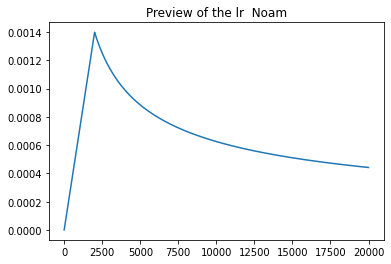

In [11]:
Informer.preview_noam()

In [ ]:
Informer.train(epochs=10, train_all=True, f='../stock_price/train/20190723_20190731.hdf',
               val_size=0.1, test_round=1,
               save='train',patience=40)

  0%|          | 0/10 [00:00<?, ?it/s]

After training train\20190401_20190412  Train_loss:0.923348 R2:0.230646 | Val_Loss:0.769128 |R2:0.367447 |Rate:0.692 |lr:0.001251
After training train\20190523_20190604  Train_loss:0.657650 R2:0.336198 | Val_Loss:0.655272 |R2:0.355480 |Rate:0.688 |lr:0.001077
After training train\20190617_20190628  Train_loss:0.436760 R2:0.337919 | Val_Loss:0.430108 |R2:0.352459 |Rate:0.683 |lr:0.000889
After training train\20190723_20190731  Train_loss:0.260899 R2:0.366289 | Val_Loss:0.254780 |R2:0.378231 |Rate:0.678 |lr:0.000806
Save here
Epoch:  1 |Train_Loss:0.569664 |R2:0.317763|Val_Loss:0.527322 |R2:0.363404 |Rate:0.685 |lr:0.000806
Test_Loss:0.296626 |R2:0.353232 |Rate:0.682 
Validation R2 increased (-inf --> 0.363404).  Saving model ...
After training train\20190401_20190412  Train_loss:0.749160 R2:0.374128 | Val_Loss:1.003000 |R2:0.178074 |Rate:0.621 |lr:0.000707
After training train\20190523_20190604  Train_loss:0.615481 R2:0.378995 | Val_Loss:0.923091 |R2:0.081078 |Rate:0.589 |lr:0.000645
Af